$\Huge{Data \ project}$

In [1]:
#Importing the packages that we need:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import pydst
import ipywidgets as widgets

# We also use the following API's:

#!pip install git+https://github.com/elben10/pydst
#!pip install pandas-datareader
#!pip install matplotlib-venn


dst = pydst.Dst(lang='en')

We want to examine whether there is a correlation between real estate pricing of family homes and the rental rate. This is based on the economic assumption that lower rates increase the pricing of financial assets (in this case housing loans) as the discountrate becomes smaller. We are gonna use the rent on the certificates of deposit in the Danish National Bank as the rental rate. First we load the real estate prices for each region in Denmark on a monthly basis from 2006 to 2020 january.

$\Large{Fetching\ our\ data\ for\ real\ estate\ prices}$

In [2]:
# a. Loading dataset from Denmarks statistics
ej14_true = dst.get_data(table_id = 'ej14', variables={'REGION':['*'], 'EJENDOMSKATE':['*'], 'TAL':['*'], 'TID':['*']})

# We drop the parts of our dataset that we don't intend to use
I = ej14_true.EJENDOMSKATE.str.contains('Owner')
I |= ej14_true.TAL.str.contains('Percentage')
ej14_true.loc[I, :]

ej14_true = ej14_true.loc[I == False] # keep everything else
ej14_true.head(10)

,REGION,EJENDOMSKATE,TAL,TID,INDHOLD
0,All Denmark,One-family houses,Index,2006M01,92.5
6,Region Nordjylland,One-family houses,Index,2006M01,94.1
12,Region Midtjylland,One-family houses,Index,2006M01,93.9
18,Region Syddanmark,One-family houses,Index,2006M01,94.6
24,Region Hovedstaden,One-family houses,Index,2006M01,90.0
30,Region Sjælland,One-family houses,Index,2006M01,91.7
36,All Denmark,One-family houses,Index,2006M02,94.2
42,Region Nordjylland,One-family houses,Index,2006M02,97.4
48,Region Midtjylland,One-family houses,Index,2006M02,94.6
54,Region Syddanmark,One-family houses,Index,2006M02,94.2


We want to make our table above look a little nicer which is why we do different things such that it looks a little better:

In [3]:
# First of all we deletes the columns that are constant:
del ej14_true['EJENDOMSKATE']
del ej14_true['TAL']

# We also rename our columns so that they make more sense:
ej14_true.rename(columns = {'INDHOLD':'Price'}, inplace=True)
ej14_true.rename(columns = {'TID':'Year'}, inplace=True)
ej14_true.rename(columns = {'REGION':'Region'}, inplace=True)


# Last of all we sort the table first by region and then by year:
ej14_true = ej14_true.sort_values(['Region', 'Year'])
ej14_true.head(5)

,Region,Year,Price
0,All Denmark,2006M01,92.5
36,All Denmark,2006M02,94.2
72,All Denmark,2006M03,96.4
108,All Denmark,2006M04,98.8
144,All Denmark,2006M05,100.4


We will now explore the dataset by creating an interactive figure that shows the real estate prices through time for each region:

In [4]:
# We make sure that the price is a float:
ej14_true['Price'] = ej14_true.Price.astype(float)

# We then create a function that creates a static plot:
def plot_ej14_true(region): 
    y = 'Price'
    ax = ej14_true[ej14_true.Region == region].plot(x='Year', y=y, style='-o')

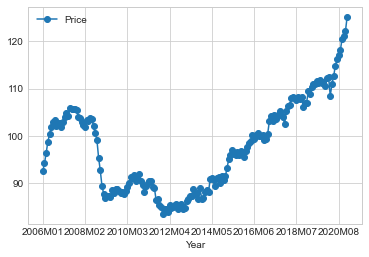

In [11]:
# Here we create the interactive plot, so that it is possible to choose which region you want to see the real estate prices for:
widgets.interact(plot_ej14_true, 
    
    ej14_true = widgets.fixed(ej14_true),
    region = widgets.Dropdown(description='Region', 
                                    options=ej14_true.Region.unique())
                 
); 

We also want to look at the rate and for this reason we load another dataset containing the rates in Denmark.

In [6]:
# We load dowm the dataset for the rate
rate = dst.get_data(table_id = 'DNRENTM', variables={'INSTRUMENT':['*'], 'LAND':['*'], 'OPGOER':['*'], 'TID':['*']})


# We delete the observations for which we dont have data for the housing prices:
I = rate.TID.str.contains('1985')
I |= rate.TID.str.contains('1986')
I |= rate.TID.str.contains('1987')
I |= rate.TID.str.contains('1988')
I |= rate.TID.str.contains('1989')
I |= rate.TID.str.contains('1990')
I |= rate.TID.str.contains('1991')
I |= rate.TID.str.contains('1992')
I |= rate.TID.str.contains('1993')
I |= rate.TID.str.contains('1994')
I |= rate.TID.str.contains('1995')
I |= rate.TID.str.contains('1996')
I |= rate.TID.str.contains('1997')
I |= rate.TID.str.contains('1998')
I |= rate.TID.str.contains('1999')
I |= rate.TID.str.contains('2000')
I |= rate.TID.str.contains('2001')
I |= rate.TID.str.contains('2002')
I |= rate.TID.str.contains('2003')
I |= rate.TID.str.contains('2004')
I |= rate.TID.str.contains('2005')
rate.loc[I, :]

rate = rate.loc[I == False] # keep everything else

# We only use the ultimo rate of the month since the average does not make sense for this rate
I = rate.OPGOER.str.contains('Monthly')
rate.loc[I, :]

rate = rate.loc[I == False] # keep everything else

# We only want the rate for certificates of deposit and we select that date using the following code:
# Here we do the opposite of all the other cases where we identify which rows contains "certificates" and then delete everything else
I = rate.INSTRUMENT.str.contains('Certificates')
rate.loc[I, :]

rate = rate.loc[I == True] # Delete everything else

# Delete columns that no longer are relevant
del rate['LAND']
del rate['OPGOER']
del rate['INSTRUMENT']

#Sort for time
rate = rate.sort_values(['TID'])

#Renaming the column for the rate
rate.rename(columns = {'INDHOLD':'Rental_rate'}, inplace=True)
rate.rename(columns = {'TID':'Year'}, inplace=True)

rate.head(10)

,Year,Rental_rate
6640,2006M01,2.4000
6641,2006M02,2.5000
30432,2006M03,2.7500
30433,2006M04,2.7500
30616,2006M05,2.7500
30617,2006M06,3.0000
20854,2006M07,3.0000
20855,2006M08,3.2500
21038,2006M09,3.2500
21039,2006M10,3.5000


As before we want to examine the rental rate through time which we do through a plot:

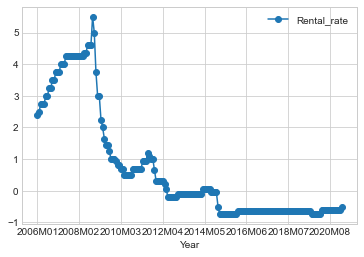

In [7]:
# We want to make sure that the rental rate is a float
rate['Rental_rate'] = rate.Rental_rate.astype(float)

# Now we plot the rate:
ax = rate.plot(x='Year', y='Rental_rate', style='-o')


We then want to merge the two datasets:

In [8]:
# We merge the datasets
merged_true = pd.merge(ej14_true,rate,how='inner',on=['Year'])

# Then we sort the values as before:
merged_true = merged_true.sort_values(['Region','Year'])

merged_true.tail(10)

,Region,Year,Price,Rental_rate
1031,Region Syddanmark,2020M04,113.7,-0.6
1037,Region Syddanmark,2020M05,112.5,-0.6
1043,Region Syddanmark,2020M06,114.3,-0.6
1049,Region Syddanmark,2020M07,116.3,-0.6
1055,Region Syddanmark,2020M08,115.5,-0.6
1061,Region Syddanmark,2020M09,115.3,-0.6
1067,Region Syddanmark,2020M10,118.8,-0.6
1073,Region Syddanmark,2020M11,119.9,-0.6
1079,Region Syddanmark,2020M12,118.2,-0.6
1085,Region Syddanmark,2021M01,123.2,-0.6


We want to calculate the correlation between the real estate pricing and the rental rate:

In [9]:
# First we make sure that the two variables are floats:
merged_true['Rental_rate'] = merged_true.Rental_rate.astype(float)
merged_true['Price'] = merged_true.Price.astype(float)

# Then we create a function which can calculate the correlation coefficient:
def corr_merged_true(region): 
    print(merged_true[merged_true.Region == region]['Price'].corr(merged_true['Rental_rate']))
    
# Here we would have liked to make a table containing the correlation coefficiennt for each region,
# but we could not get it to work and for this reason we did another drop down thingy:
widgets.interact(corr_merged_true, 
    
    merged_true = widgets.fixed(merged_true),
    region = widgets.Dropdown(description='Region', 
                                    options=merged_true.Region.unique())); 

-0.057102469414826294


We decided to try to see if we could do a regression which tries to explain the real estate price with the rate. We do this mostly to see how you do such a thing in pyton since it does not make a whole lot of sense in our particular case. 

In [10]:
# Importing an econometric package
import statsmodels.formula.api as sm

# Defining a function which does the regression
def OLS(region):
    df = merged_true[merged_true.Region == region]
    result = sm.ols(formula="Price ~ Rental_rate", data=df).fit()
    print(result.params)
    print(result.summary())

# Making the dropdown widget(again) so that we can do the regression for each of the regions. 
widgets.interact(OLS,
    region = widgets.Dropdown(description='Region', 
                                    options=merged_true.Region.unique())
                 
); 

Intercept      97.967081
Rental_rate    -0.312360
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5856
Date:                Wed, 07 Apr 2021   Prob (F-statistic):              0.445
Time:                        13:30:54   Log-Likelihood:                -665.49
No. Observations:                 181   AIC:                             1335.
Df Residuals:                     179   BIC:                             1341.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------